In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loadind and analysing data

In [2]:
df = pd.read_csv('Admission_Predict.csv',sep = ';')
df.head(10)
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [3]:
df = df.drop(['Serial No.'],axis = 1) 
df.shape

(500, 8)

# Correleation matrix of data

In [4]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# Defining dependent and Independent variables

In [5]:
# Splitting the dataset into the Training set and Test set
X_train = df.iloc[:,:-1].values
Y_train = df.iloc[:,-1].values
Y_train = Y_train.reshape(-1,1) 

# Defining Gradient Descent function for Linear regression

In [6]:
def GD(X,Y,lr=1e-3,iter_=4000,norm = True,name = "Linear Regression"):
    if(norm):
        sc= StandardScaler()
        X = sc.fit_transform(X)
        scy= StandardScaler()
        Y = scy.fit_transform(Y)
    m = Y.shape[0] #rows
    f = X.shape[1] #Features
    w = np.zeros((f,1)) #initialize weights
    b = 0 # initialize bias term
    costs = []
    # Now we iterate for iter_ no. of steps and update parameters
    for i in range(iter_):
        y_hat = np.dot(X,w)+b  #Hypothesized output
        error = Y-y_hat #Error between hypothesized and rel target value
        # Calculation of cost
        if(norm):
            cost = np.sum((scy.inverse_transform(Y)-scy.inverse_transform(y_hat))**2)/m
        else:
            cost = np.sum((error)**2)/m
        costs.append(cost)
        # update parameters for linear regression
        db = (-2/m)*lr*np.sum(error)  #differntiation of cost function wrt to bias
        dw = (-2/m)*lr*np.dot(X.T, error) #differntiation of cost function wrt to weigths
        w = w - dw
        b = b - db
        
        if (i+1)%200==0:
            print("{}: cost = {}".format(i,cost))
    # Plotting the final Predicted and Real target Values
    y_pred = np.dot(X,w)+b
    if(norm):
        y_pred = scy.inverse_transform(y_pred)
        Y = scy.inverse_transform(Y)
#     print(y_pred.shape,Y.shape)
    plt.scatter(Y,y_pred)
    plt.title(name)
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.show()
    return costs

In [7]:
models = {}
models_with_norm = {}
models_without_norm = {}

# Linear Regression without Normalization

C:\Users\Arush\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
C:\Users\Arush\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in subtract


199: cost = nan
399: cost = nan
599: cost = nan
799: cost = nan
999: cost = nan
1199: cost = nan
1399: cost = nan
1599: cost = nan
1799: cost = nan
1999: cost = nan
2199: cost = nan
2399: cost = nan
2599: cost = nan
2799: cost = nan
2999: cost = nan
3199: cost = nan
3399: cost = nan
3599: cost = nan
3799: cost = nan
3999: cost = nan


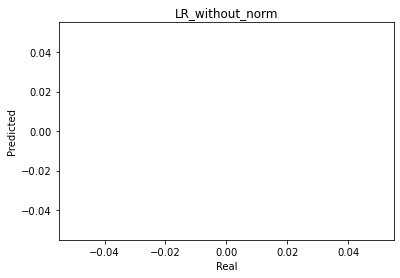

In [8]:
model_name = 'LR_without_norm'
models[model_name] = GD(X_train,Y_train,norm = False,name = model_name)

# Linear Regression with Normalization

199: cost = 0.004465358512675807
399: cost = 0.003995625716413954
599: cost = 0.0038991439896004956
799: cost = 0.0038327000480219554
999: cost = 0.0037820088925054627
1199: cost = 0.003742404096341055
1399: cost = 0.0037108665136603145
1599: cost = 0.003685336168404546
1799: cost = 0.003664377272289214
1999: cost = 0.0036469680376607903
2199: cost = 0.003632365862642355
2399: cost = 0.003620019720494824
2599: cost = 0.0036095124508522783
2799: cost = 0.0036005222012216375
2999: cost = 0.0035927962741052442
3199: cost = 0.0035861331073395726
3399: cost = 0.0035803696538606426
3599: cost = 0.0035753723932634546
3799: cost = 0.0035710308198009812
3999: cost = 0.0035672526431572774


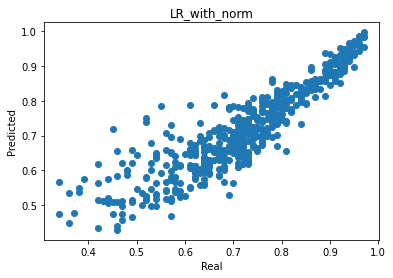

In [9]:
model_name = 'LR_with_norm'
models[model_name] = GD(X_train,Y_train,name = model_name)

# Linear Regression for differnt Learning Rates

C:\Users\Arush\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
C:\Users\Arush\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in subtract


199: cost = nan
399: cost = nan
599: cost = nan
799: cost = nan
999: cost = nan
1199: cost = nan
1399: cost = nan
1599: cost = nan
1799: cost = nan
1999: cost = nan
2199: cost = nan
2399: cost = nan
2599: cost = nan
2799: cost = nan
2999: cost = nan
3199: cost = nan
3399: cost = nan
3599: cost = nan
3799: cost = nan
3999: cost = nan


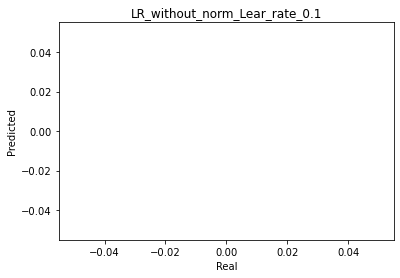

199: cost = nan
399: cost = nan
599: cost = nan
799: cost = nan
999: cost = nan
1199: cost = nan
1399: cost = nan
1599: cost = nan
1799: cost = nan
1999: cost = nan
2199: cost = nan
2399: cost = nan
2599: cost = nan
2799: cost = nan
2999: cost = nan
3199: cost = nan
3399: cost = nan
3599: cost = nan
3799: cost = nan
3999: cost = nan


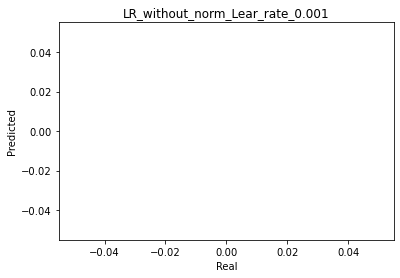

C:\Users\Arush\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


199: cost = inf
399: cost = nan
599: cost = nan
799: cost = nan
999: cost = nan
1199: cost = nan
1399: cost = nan
1599: cost = nan
1799: cost = nan
1999: cost = nan
2199: cost = nan
2399: cost = nan
2599: cost = nan
2799: cost = nan
2999: cost = nan
3199: cost = nan
3399: cost = nan
3599: cost = nan
3799: cost = nan
3999: cost = nan


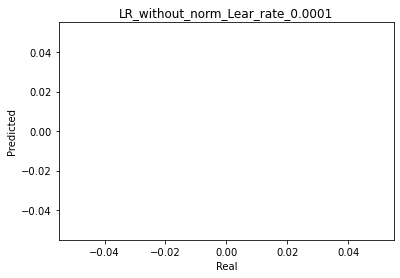

199: cost = 4.370773350334499e+36
399: cost = 5.5628039541164634e+73
599: cost = 7.07993422481312e+110
799: cost = 9.010827820129727e+147
999: cost = 1.1468329425922978e+185
1199: cost = 1.4596059590404948e+222
1399: cost = 1.8576808151768208e+259
1599: cost = 2.364321678533474e+296
1799: cost = inf
1999: cost = inf
2199: cost = inf
2399: cost = inf
2599: cost = inf
2799: cost = inf
2999: cost = inf
3199: cost = inf
3399: cost = nan
3599: cost = nan
3799: cost = nan
3999: cost = nan


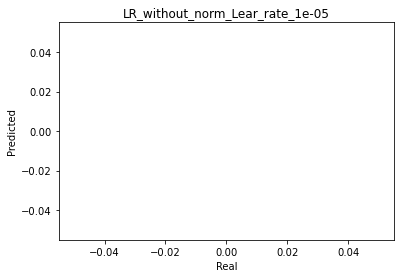

199: cost = 0.014412467357455765
399: cost = 0.014343850365826406
599: cost = 0.01433961367497258
799: cost = 0.01433538817499632
999: cost = 0.014331166337480003
1199: cost = 0.014326948158015246
1399: cost = 0.014322733633076712
1599: cost = 0.014318522759142596
1799: cost = 0.014314315532694558
1999: cost = 0.014310111950217664
2199: cost = 0.014305912008200465
2399: cost = 0.014301715703134916
2599: cost = 0.014297523031516426
2799: cost = 0.014293333989843776
2999: cost = 0.014289148574619265
3199: cost = 0.014284966782348545
3399: cost = 0.0142807886095407
3599: cost = 0.014276614052708225
3799: cost = 0.014272443108367045
3999: cost = 0.014268275773036469


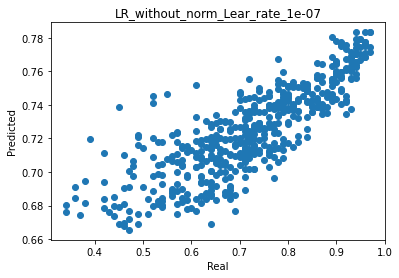

199: cost = 0.23015419294037492
399: cost = 0.10241973371625385
599: cost = 0.05029142897430477
799: cost = 0.029017771647381722
999: cost = 0.020335804436151336
1199: cost = 0.016792468635420103
1399: cost = 0.015346193093668529
1599: cost = 0.014755721645381924
1799: cost = 0.014514501331027373
1999: cost = 0.014415809390273848
2199: cost = 0.014375282877776206
2399: cost = 0.014358493525760914
2599: cost = 0.014351391260263075
2799: cost = 0.014348242287768634
2999: cost = 0.014346706664149089
3199: cost = 0.014345829465143813
3399: cost = 0.014345220988992363
3599: cost = 0.014344722199560036
3799: cost = 0.014344268194669886
3999: cost = 0.014343832487933911


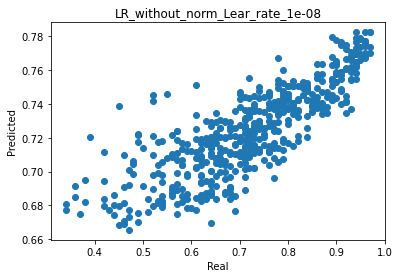

199: cost = 0.49591898864655526
399: cost = 0.4546758951546899
599: cost = 0.4169650000566844
799: cost = 0.38248379359258056
999: cost = 0.35095567399078215
1199: cost = 0.32212772861778965
1399: cost = 0.2957687051579928
1599: cost = 0.271667156548684
1799: cost = 0.2496297447892914
1999: cost = 0.22947969001829077
2199: cost = 0.2110553524165669
2399: cost = 0.19420893556150554
2599: cost = 0.17880530083035143
2799: cost = 0.16472088334218848
2999: cost = 0.15184270074242057
3199: cost = 0.14006744687839645
3399: cost = 0.12930066309581145
3599: cost = 0.11945598050816321
3799: cost = 0.11045442716089132
3999: cost = 0.10222379453239219


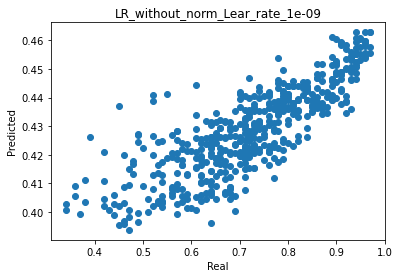

In [10]:
lrs = [0.1,0.001, 1e-4,1e-5,1e-7,1e-8,1e-9]#different Learning rates to experiment with
for lr in lrs:
    model_name = 'LR_without_norm_Lear_rate_'+str(lr)
    models_without_norm[model_name] = GD(X_train,Y_train,lr,norm = False,name = model_name)

199: cost = 0.003540751890236229
399: cost = 0.003540750862259676
599: cost = 0.0035407508622541032
799: cost = 0.003540750862254103
999: cost = 0.0035407508622541032
1199: cost = 0.0035407508622541032
1399: cost = 0.0035407508622541032
1599: cost = 0.0035407508622541032
1799: cost = 0.0035407508622541032
1999: cost = 0.0035407508622541032
2199: cost = 0.0035407508622541032
2399: cost = 0.0035407508622541032
2599: cost = 0.0035407508622541032
2799: cost = 0.0035407508622541032
2999: cost = 0.0035407508622541032
3199: cost = 0.0035407508622541032
3399: cost = 0.0035407508622541032
3599: cost = 0.0035407508622541032
3799: cost = 0.0035407508622541032
3999: cost = 0.0035407508622541032


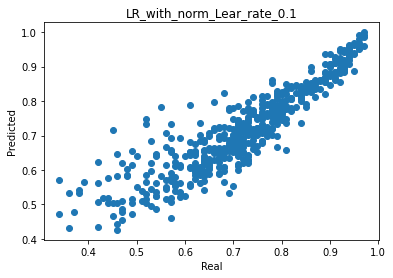

199: cost = 0.004465358512675807
399: cost = 0.003995625716413954
599: cost = 0.0038991439896004956
799: cost = 0.0038327000480219554
999: cost = 0.0037820088925054627
1199: cost = 0.003742404096341055
1399: cost = 0.0037108665136603145
1599: cost = 0.003685336168404546
1799: cost = 0.003664377272289214
1999: cost = 0.0036469680376607903
2199: cost = 0.003632365862642355
2399: cost = 0.003620019720494824
2599: cost = 0.0036095124508522783
2799: cost = 0.0036005222012216375
2999: cost = 0.0035927962741052442
3199: cost = 0.0035861331073395726
3399: cost = 0.0035803696538606426
3599: cost = 0.0035753723932634546
3799: cost = 0.0035710308198009812
3999: cost = 0.0035672526431572774


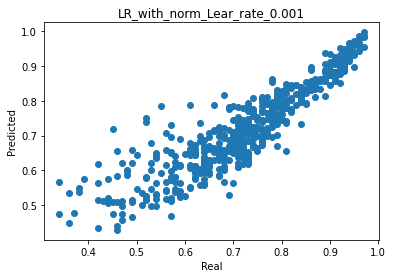

199: cost = 0.014967278866368573
399: cost = 0.011575491844954065
599: cost = 0.009246622748742151
799: cost = 0.0076460745620366
999: cost = 0.006544629309804044
1199: cost = 0.0057852575711355245
1399: cost = 0.005260381858071028
1599: cost = 0.004896301246087619
1799: cost = 0.004642521704628647
1999: cost = 0.004464446998598803
2199: cost = 0.004338371695188711
2399: cost = 0.004248051191285308
2599: cost = 0.004182352053896431
2799: cost = 0.004133642412095093
2999: cost = 0.004096689309837099
3199: cost = 0.0040679033446572215
3399: cost = 0.0040448212094517265
3599: cost = 0.00402575120641343
3799: cost = 0.0040095304028734905
3999: cost = 0.003995358266073793


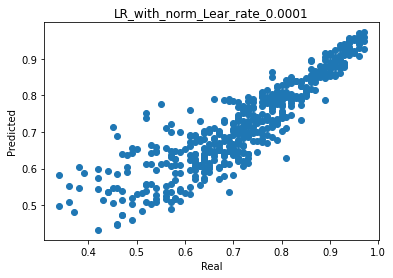

199: cost = 0.019302684175310576
399: cost = 0.018743128769860076
599: cost = 0.01820426895918951
799: cost = 0.0176853370408196
999: cost = 0.017185593798103905
1199: cost = 0.016704327443219872
1399: cost = 0.016240852599381975
1599: cost = 0.015794509320821437
1799: cost = 0.015364662149131248
1999: cost = 0.014950699204626982
2199: cost = 0.014552031311424175
2399: cost = 0.014168091154981128
2599: cost = 0.01379833247090242
2799: cost = 0.01344222926384323
2999: cost = 0.013099275055397423
3199: cost = 0.012768982159894004
3399: cost = 0.012450880987066306
3599: cost = 0.01214451937059675
3799: cost = 0.011849461921577065
3999: cost = 0.011565289405959378


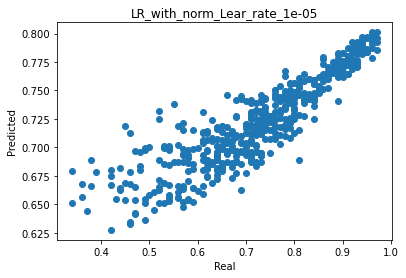

199: cost = 0.0198748838115975
399: cost = 0.01986896785707489
599: cost = 0.01986305413206305
799: cost = 0.01985714263571939
999: cost = 0.019851233367201643
1199: cost = 0.019845326325667847
1399: cost = 0.01983942151027638
1599: cost = 0.019833518920185915
1799: cost = 0.019827618554555473
1999: cost = 0.01982172041254435
2199: cost = 0.019815824493312203
2399: cost = 0.019809930796018983
2599: cost = 0.01980403931982496
2799: cost = 0.019798150063890727
2999: cost = 0.01979226302737719
3199: cost = 0.019786378209445583
3399: cost = 0.01978049560925744
3599: cost = 0.019774615225974623
3799: cost = 0.019768737058759315
3999: cost = 0.019762861106773992


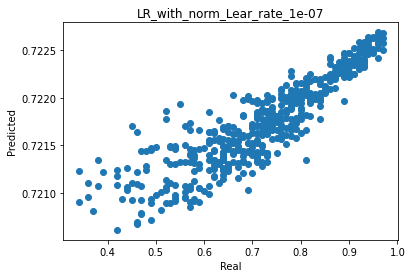

In [11]:
lrs = [0.1,0.001, 1e-4,1e-5,1e-7]#different Learning rates to experiment with
for lr in lrs:
    model_name = 'LR_with_norm_Lear_rate_'+str(lr)
    models_with_norm[model_name] = GD(X_train,Y_train,lr=lr,name = model_name)

## The cost vs. iterations plot for step (1) and (2). Discuss and analyze each plot.

Model Name:  LR_without_norm
Model Name:  LR_with_norm


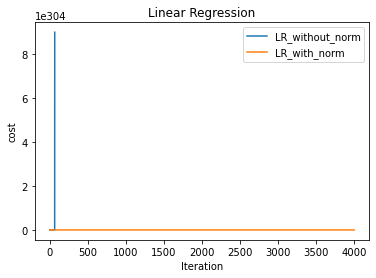

Model Name:  LR_without_norm


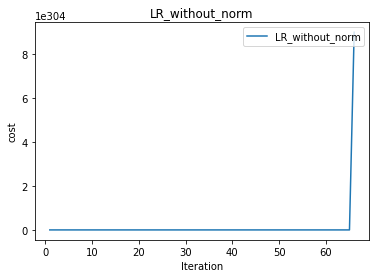

Model Name:  LR_with_norm


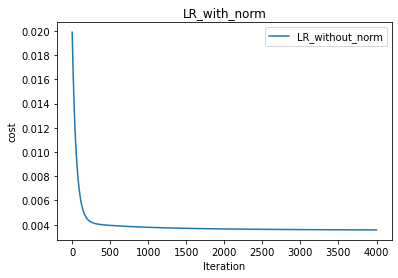

In [12]:
leg = []
for name,cost in models.items():
    leg.append(name)
    print('Model Name: ',name)
    plt.plot(range(1,len(cost)+1),cost)
plt.title("Linear Regression")
plt.xlabel('Iteration')
plt.ylabel('cost')
plt.legend(leg, loc='upper right')
plt.show()
for name,cost in models.items():
    leg.append(name)
    print('Model Name: ',name)
    plt.plot(range(1,len(cost)+1),cost)
    plt.title(name)
    plt.xlabel('Iteration')
    plt.ylabel('cost')
    plt.legend(leg, loc='upper right')
    plt.show()

# Does feature normalization improves the model learning or not? Justify your answer based on the results you got.
- Yes It improves my result as the affect of different variables is same in the case of normalized data contrary to "without" normalized data.

- It is clear that without normalization , The cost is increasing instead of decreasing.
- Cost is continuously decreasing for Normalized data.
#### Now let's explore both methods with different Learning rates

 # Effect of Learning Rates on models without normalization of data

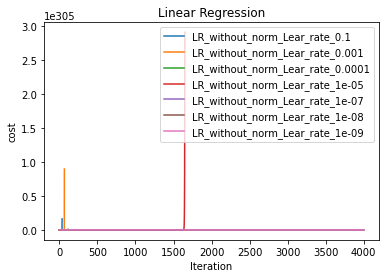

Model Name:  LR_without_norm_Lear_rate_0.1


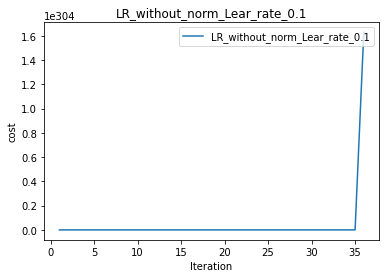

Model Name:  LR_without_norm_Lear_rate_0.001


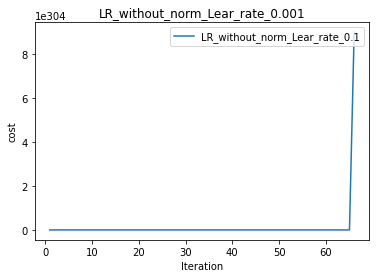

Model Name:  LR_without_norm_Lear_rate_0.0001


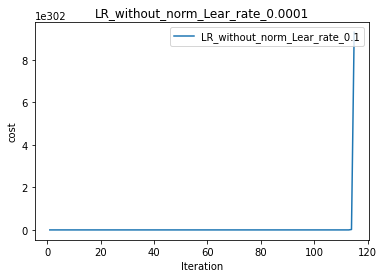

Model Name:  LR_without_norm_Lear_rate_1e-05


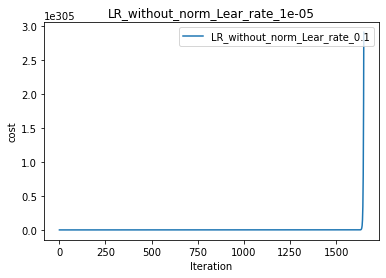

Model Name:  LR_without_norm_Lear_rate_1e-07


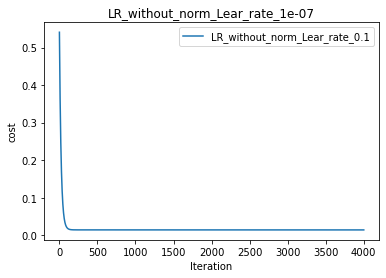

Model Name:  LR_without_norm_Lear_rate_1e-08


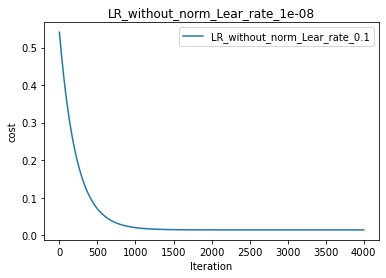

Model Name:  LR_without_norm_Lear_rate_1e-09


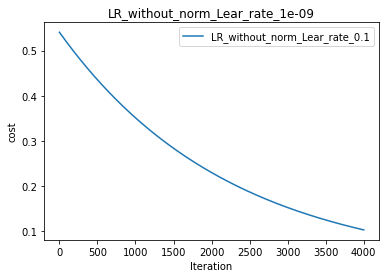

In [13]:
leg = []
for name,cost in models_without_norm.items():
    leg.append(name)
    plt.plot(range(1,len(cost)+1),cost)
plt.title('Linear Regression')
plt.xlabel('Iteration')
plt.ylabel('cost')
plt.legend(leg, loc='upper right')
plt.show()
for name,cost in models_without_norm.items():
    leg.append(name)
    print('Model Name: ',name)
    plt.plot(range(1,len(cost)+1),cost)
    plt.title(name)
    plt.xlabel('Iteration')
    plt.ylabel('cost')
    plt.legend(leg, loc='upper right')
    plt.show()

- It is clear that learning has a very deep effect on Linear Regression with gradient descent.
- Here ,We see that cost is increasing with larger learning rates -> 0.1,0.001, 1e-4,1e-5
- On the other hand cost is decreasing with learning rates smaller than 1e-5 -> 1e-7,1e-8

 # Effect of Learning Rates on models with normalization of data

Model Name:  LR_with_norm_Lear_rate_0.1
Model Name:  LR_with_norm_Lear_rate_0.001
Model Name:  LR_with_norm_Lear_rate_0.0001
Model Name:  LR_with_norm_Lear_rate_1e-05
Model Name:  LR_with_norm_Lear_rate_1e-07


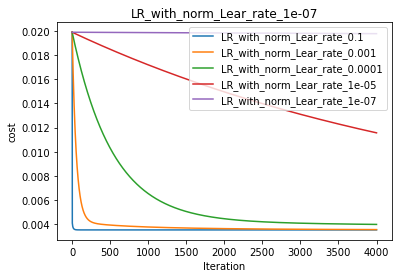

Model Name:  LR_with_norm_Lear_rate_0.1


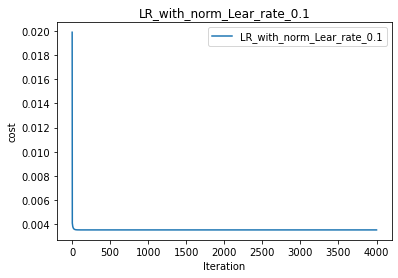

Model Name:  LR_with_norm_Lear_rate_0.001


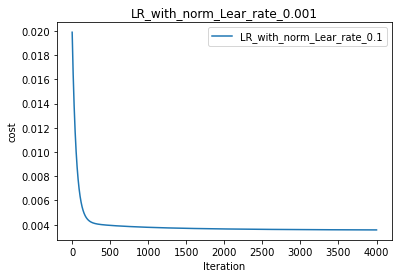

Model Name:  LR_with_norm_Lear_rate_0.0001


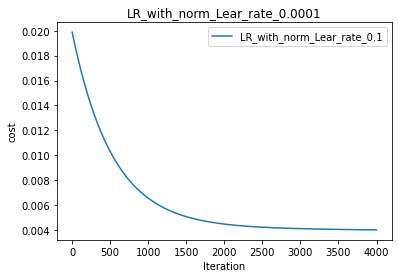

Model Name:  LR_with_norm_Lear_rate_1e-05


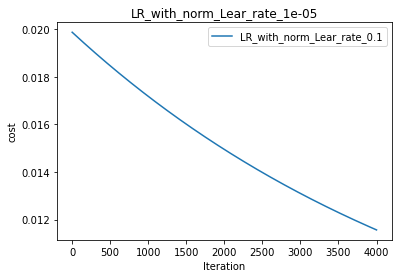

Model Name:  LR_with_norm_Lear_rate_1e-07


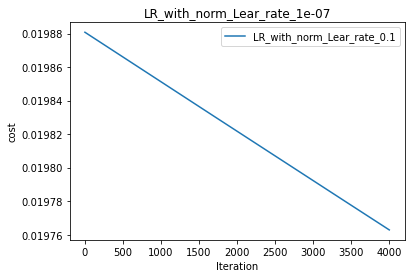

In [14]:
leg = []
for name,cost in models_with_norm.items():
    leg.append(name)
    print('Model Name: ',name)
    plt.plot(range(1,len(cost)+1),cost)
    plt.title(name)
    plt.xlabel('Iteration')
    plt.ylabel('cost')
plt.legend(leg, loc='upper right')
plt.show()
for name,cost in models_with_norm.items():
    leg.append(name)
    print('Model Name: ',name)
    plt.plot(range(1,len(cost)+1),cost)
    plt.title(name)
    plt.xlabel('Iteration')
    plt.ylabel('cost')
    plt.legend(leg, loc='upper right')
    plt.show()

With Normalization
- Now ,we get a beautiful and consistent graph.
- Here we can clearly see the effect of learning rates on cost vs iterations.
- With increasing learning rate , rate of cost optimization is increasing .

# We conclude that Normalized data gives a better result, with some Learning Rate optimization .
# Also , Learning Rate can have a very deep effect on Linear Regression model.